<a href="https://colab.research.google.com/github/SvetLanchY/CompLing/blob/main/Karan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import os
import os.path 

import string
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

os.getcwd()
os.listdir()

!pip install pymystem3==0.1.10
!pip install pymorphy2[fast]

from pymorphy2 import MorphAnalyzer
from pymystem3 import Mystem
mystem = Mystem() 
morph = MorphAnalyzer()

In [ ]:
from google.colab import files #строка импорта
files.upload()



In [3]:
with open('quran_kuliev.txt', encoding = "utf-8") as f:
    data = f.read()

In [23]:
#def preprocessed ():
data1 = data.lower()
data2 = data1.translate(str.maketrans('','',string.punctuation))
data3 = re.sub(r'[\d+]', '', data2)
data4 = re.sub(r'[«,»]', ' ', data3)
data5 = re.sub(r'[\n+]', '', data4)
data6 = mystem.lemmatize(data5)
print(data6)   


['\ufeff', 'смысловой', ' ', 'перевод', ' ', 'священный', ' ', 'коран', ' ', 'эльмир', ' ', 'кулиевсур', '   ', 'альфатих', '  ', 'открывать', ' ', 'коран', '  ', 'во', ' ', 'имя', ' ', 'аллах', ' ', 'милостивый', ' ', 'милосердный', ' ', 'хвала', ' ', 'аллах', ' ', 'господь', ' ', 'мир', ' ', 'милостивый', ' ', 'милосердный', ' ', 'властелин', ' ', 'день', ' ', 'воздаяние', ' ', 'ты', ' ', 'один', ' ', 'мы', ' ', 'поклоняться', '\xa0', 'и', '\xa0', 'ты', ' ', 'один', ' ', 'молить', ' ', 'о', '\xa0', 'помощь', ' ', 'вести', ' ', 'мы', ' ', 'прямой', ' ', 'путем', ' ', 'путем', ' ', 'тот', ' ', 'кто', ' ', 'ты', ' ', 'облагодетельствовать', ' ', 'не', ' ', 'тот', ' ', 'на', ' ', 'кто', ' ', 'пасть', ' ', 'гнев', ' ', 'и', '\xa0', 'не', ' ', 'заблудшихсур', '   ', 'альбакар', '  ', 'корова', ' ', 'во', ' ', 'имя', ' ', 'аллах', ' ', 'милостивый', ' ', 'милосердный', ' ', 'алиф', ' ', 'лама', ' ', 'мим', ' ', 'этот', ' ', 'писание', ' ', 'в', '\xa0', 'который', ' ', 'нет', ' ', 'сомнение'

In [31]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')


rustopwords = stopwords.words('russian')
rustopwords.extend(['\xa0', '\xa0— ', 'который', 'это', 'свой', 'весь', 'твой', 'ваш', 'наш', ' '])
data7 = [word for word in data6 if word not in rustopwords]
print(sorted(data7))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[' \n', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', 

In [34]:
from nltk.probability import FreqDist
fdist = FreqDist(data7)
fdist.most_common(10)

[('  ', 3358),
 ('аллах', 2917),
 ('сказать', 1334),
 ('воистину', 899),
 ('господь', 837),
 ('человек', 679),
 ('день', 502),
 ('уверовать', 502),
 ('земля', 500),
 ('являться', 496)]

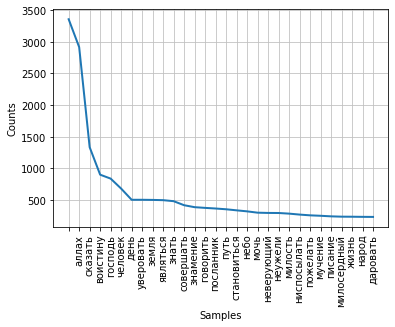

In [35]:
fdist.plot(30,cumulative=False)

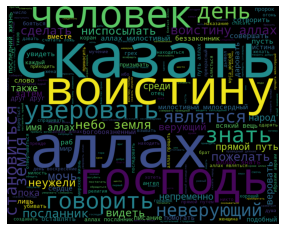

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

text_raw = " ".join(data7)
#wordcloud = WordCloud().generate(text_raw)

# wc = WordCloud().generate(text_raw)
# plt.axis("off")
# plt.imshow(wc)

wc = WordCloud(background_color="black", max_words=200, width=1000, height=800).generate(text_raw)# to recolour the image
plt.axis("off")
plt.imshow(wc)
